In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import sys
import os
from funcs import *
from simulator import *
import seaborn as sns

In [2]:
def score_geral(namefile):
    entrada = open(f'in/{namefile}.txt', 'r')
    saida = open(f'out/{namefile}.out', 'w')

    D,I,S,V,F, sts, cars, inters = pega_input(entrada.readline)
    schedule = sol_batata(D,I,S,V,F, sts, cars, inters)
    output = form_out(schedule)[:-1]
    bkp_cars = cars.copy()
    total, finished_cars = score(D, F, sts, cars, inters, schedule)
    #print(f'score: {total:,}')
    return cars, bkp_cars, finished_cars, total, sts, inters, schedule, total
cars, bkp_cars, finished_cars, total, sts, inters, schedule, total = score_geral("e")

In [3]:
# Cada linha é um carro, cada coluna é uma estatística do carro
def data_car(cars, sts, bkp_cars):
    data = []
    cars.update(finished_cars)
    for car in cars:
        #print(cars[car])
        path = bkp_cars[car]#['path']
        qtde_ruas = len(path)# - 1
        
        total_tam_ruas = 0
        for st in path[1:]:
            dims = sts[st]['size']
            tam_rua = dims[2]
            total_tam_ruas += tam_rua
            #print(f'rua {st} : {dims}')
            
        ruas_intersec = 0
        for car2 in cars:
            path1 = set(path)      
            
            path2 = bkp_cars[car2]#['path']
            #qtde_ruas = len(path2) - 1
            path2 = set(path2)
            
            intersecs = len(path1.intersection(path2))
            ruas_intersec += intersecs
            
        sts_with_intersect = 0#{}
        for st in path:
            #st_has_intersect[st] = False 
            for car2 in cars:
                path = bkp_cars[car]#['path'] 
                if st in path:
                    #st_has_intersect[st] = True
                    sts_with_intersect += 1
                    break
        #print('sthasinter', st_has_intersect)
        score_car = cars[car]['score']
        #print(f'{car} : ruas: {qtde_ruas}, tamanhototal: {total_tam_ruas}')
        data.append([ car, qtde_ruas, total_tam_ruas, ruas_intersec, sts_with_intersect, score_car ])
    df = pd.DataFrame(data, columns=['Carro', 'Ruas', 'Tamanho total', 'Ruas em comum', 'Ruas com intersec', 'Score'])
    display(df.describe())
    #print(bkp_cars)
    #print(schedule)
    return df
df = data_car(cars, sts, bkp_cars)

,Carro,Ruas,Tamanho total,Ruas em comum,Ruas com intersec,Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,1.778000,38.491000,5.860000,1.778000,623.318000
std,288.819436,1.717459,86.491287,5.948427,1.717459,421.624872
min,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,249.750000,1.000000,0.000000,3.000000,1.000000,0.000000
50%,499.500000,1.000000,0.000000,4.000000,1.000000,752.000000
75%,749.250000,1.000000,0.000000,6.000000,1.000000,975.250000
max,999.000000,10.000000,467.000000,39.000000,10.000000,1173.000000


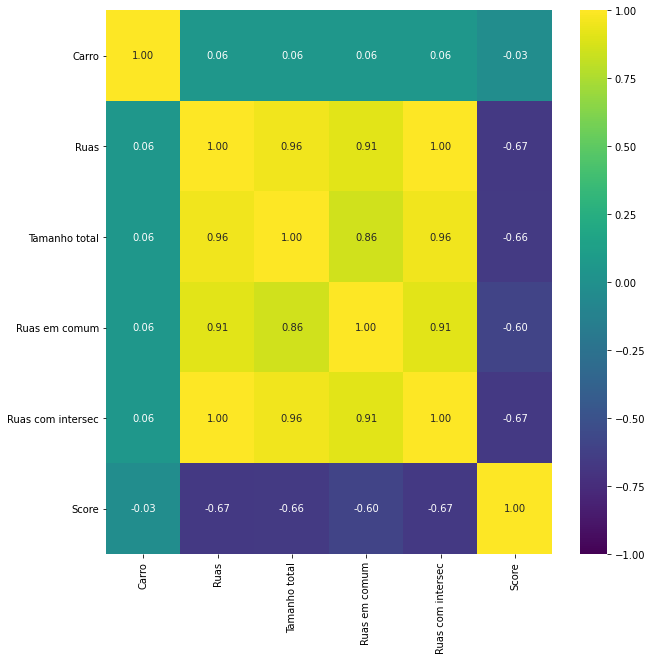

In [4]:
plt.figure(figsize=(10, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='viridis', vmin=-1, vmax=1);

In [5]:
def data_sts(sts, cars, bkp_cars, inters):  
    data = []
    for st in sts:
        #print(sts[st])
        cars_with_st = 0
        score_st = 0
        for car in bkp_cars:
            if(st in set(bkp_cars[car])):
                cars_with_st += 1
                score_st += cars[car]['score']
        aux = sts[st]['size']
        tam_st = aux[2]
        coming = aux[0]
        going = aux[1]
        qtd_desembocam = len(inters[coming]['sts'])

        data.append([cars_with_st, tam_st, coming, going, qtd_desembocam, score_st])
    df_st = pd.DataFrame(data, columns=['Carros que passam por essa rua', 'Tamanho da Rua', 'Vem de', 'Vai para', 
            'Quantidade de ruas que desembocam nela', 'Score dos que passaram'])
    display(df_st.describe())
    return df_st
df_st = data_sts(sts, cars, bkp_cars, inters)

,Carros que passam por essa rua,Tamanho da Rua,Vem de,Vai para,Quantidade de ruas que desembocam nela,Score dos que passaram
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,1.781563,50.595190,311.374749,311.625251,63.374749,624.567134
std,1.643314,28.469034,165.300164,165.206086,107.658911,885.040854
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,26.000000,166.000000,166.250000,1.000000,0.000000
50%,1.000000,50.000000,332.000000,332.500000,1.000000,0.000000
75%,3.000000,75.000000,498.000000,498.750000,2.000000,1045.000000
max,10.000000,100.000000,499.000000,499.000000,250.000000,4968.000000


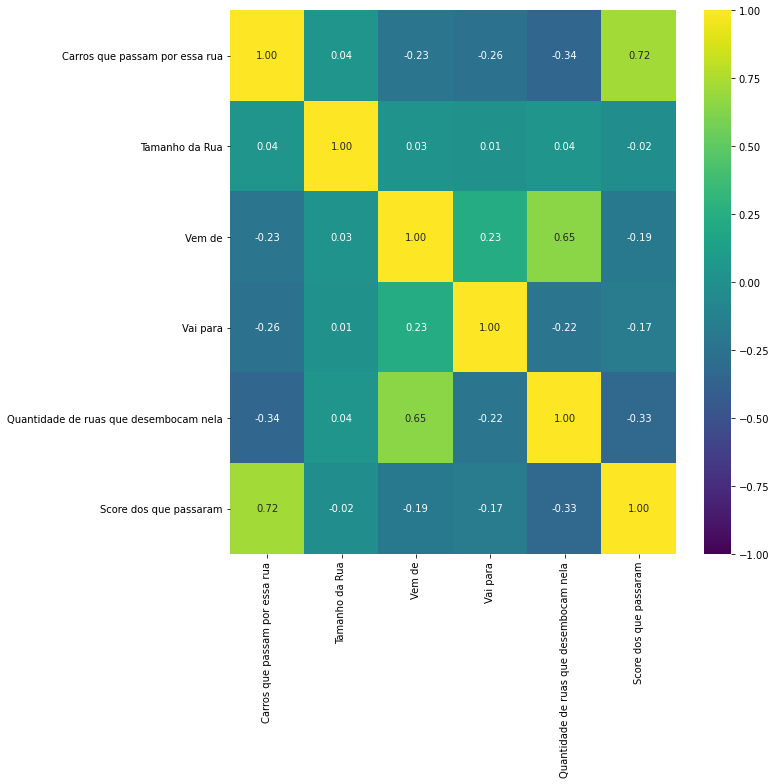

In [6]:
plt.figure(figsize=(10, 10))
corr = df_st.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='viridis', vmin=-1, vmax=1);
#print(bkp_cars)

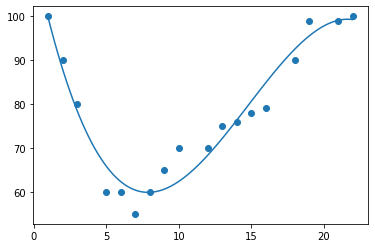

In [7]:
import numpy
from sklearn.metrics import r2_score

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

speed = mymodel(17)

myline = numpy.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

#print(speed) 

In [8]:
def transform_schedule(schedule, score_t): 
    new_schedule = {}
    for _, value in schedule.items():
        progs = value['prog'].copy()
        for prog in progs:
            st_name = prog['st']
            t = prog['t']
            #prog['score'] = score
            new_schedule[st_name] = {'t': t, 'score': score_t}
    return new_schedule
#transform_schedule(schedule, total)

In [9]:
dic = {}
for t in range(0,10):
    cars, bkp_cars, finished_cars, total, sts, inters, schedule, total = score_geral("e")
    schedule = transform_schedule(schedule, total)
    sts_list = set(dic.keys())
    for st_name, value in schedule.items():
        if st_name in sts_list :
            dic[st_name].append(value)
        else:
            dic[st_name] = []
#print(dic)

In [10]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
linhas = 2
variaveis = 2
X = np.arange(linhas * variaveis).reshape(linhas, variaveis)

y = [[1, 3], [2,1]]
deg = 3

poly = PolynomialFeatures(deg)
print(poly.fit_transform(X, y), '\n')



poly = PolynomialFeatures(deg, interaction_only=False)
print(poly.fit_transform(X))


[[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]] 

[[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [11]:
print(poly.powers_)

[[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]
 [3 0]
 [2 1]
 [1 2]
 [0 3]]


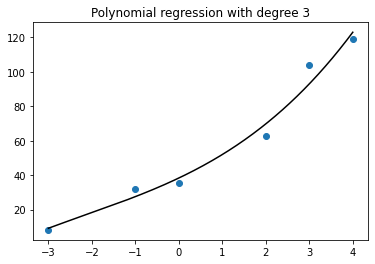

In [12]:
import pandas as pd
#xdic={'X': {11: 300, 12: 170, 13: 99, 14: }} 
#ydic={'y': {11: 305000, 12: 270000}}

def pol(x):
    x = x + random.random()
    return (x*x*x + 3*x + 34 )

xdic = [-3, -1, 0, 4, 3, 2]#, [-3, -1, 0, 4, 3, 2]]
ydic = [pol(el)for el in xdic] #,  [pol(el)for el in xdic[1]]]
X = pd.DataFrame.from_dict(xdic)
y = pd.DataFrame.from_dict(ydic)

import numpy as np4
X_seq = np.linspace(X.min(), X.max(), 300).reshape(-1,1)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
#from sklearn.svm import SVC

degree = 3
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X,y)

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X,y)
plt.plot(X_seq,polyreg.predict(X_seq),color="black")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

In [13]:
# example of a multi-output regression problem
from sklearn.datasets import make_regression
# create dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, n_targets=3, random_state=2)
# summarize shape
print(X.shape, y.shape)

(1000, 10) (1000, 3)


In [14]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,-0.998594,2.192843,-0.426326,-0.210433,-1.136556,-0.556716,-0.631690,-0.876251,-0.994456,-0.367749
1,-0.886219,0.582614,0.139033,-1.075892,-0.682624,1.062319,-0.739932,0.772704,0.641540,-1.130404
2,-0.664368,0.274479,-1.600997,0.364480,0.293683,0.817516,0.005450,-1.190788,-0.036723,-0.549656
3,1.312484,-0.852580,0.319529,-0.049257,1.998461,1.093359,1.813193,-0.817975,-1.089942,0.914610
4,-0.914343,0.201153,1.189729,0.115378,0.168460,-1.625434,0.527366,0.387920,-0.643904,0.355701


In [29]:
# mlp for multi-output regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [30]:
model = Sequential()
model.add(Dense(20, input_dim=10, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(3))
model.compile(loss='mae', optimizer='adam')

In [31]:
# get the dataset
def get_dataset():
	X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, n_targets=3, random_state=2)
	return X, y

In [32]:
# get the model
def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(n_outputs))
	model.compile(loss='mae', optimizer='adam')
	return model

In [33]:
# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y):
	results = list()
	n_inputs, n_outputs = X.shape[1], y.shape[1]
	# define evaluation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# enumerate folds
	for train_ix, test_ix in cv.split(X):
		# prepare data
		X_train, X_test = X[train_ix], X[test_ix]
		y_train, y_test = y[train_ix], y[test_ix]
		# define model
		model = get_model(n_inputs, n_outputs)
		# fit model
		model.fit(X_train, y_train, verbose=0, epochs=100)
		# evaluate model on test set
		mae = model.evaluate(X_test, y_test, verbose=0)
		# store result
		print('>%.3f' % mae)
		results.append(mae)
	return results

In [ ]:
# load dataset
X, y = get_dataset()
# evaluate model
results = evaluate_model(X, y)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(results), std(results)))

>9.883
>7.684
>7.551
>7.416
>8.225
>8.253
>7.361
>9.517
>7.969
>8.054
>10.188
>7.466
>7.693
>6.695
>8.447
>9.689
>6.976
>7.830
>7.777
